# 04. Классификация, логистическая регрессия

In [ ]:
import ipywidgets as widgets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(11.7,8.27)})

import os # для обработки пути к данным как на Unix-системах, так и на Windows

## Data

In [ ]:
iris = sns.load_dataset("iris")

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


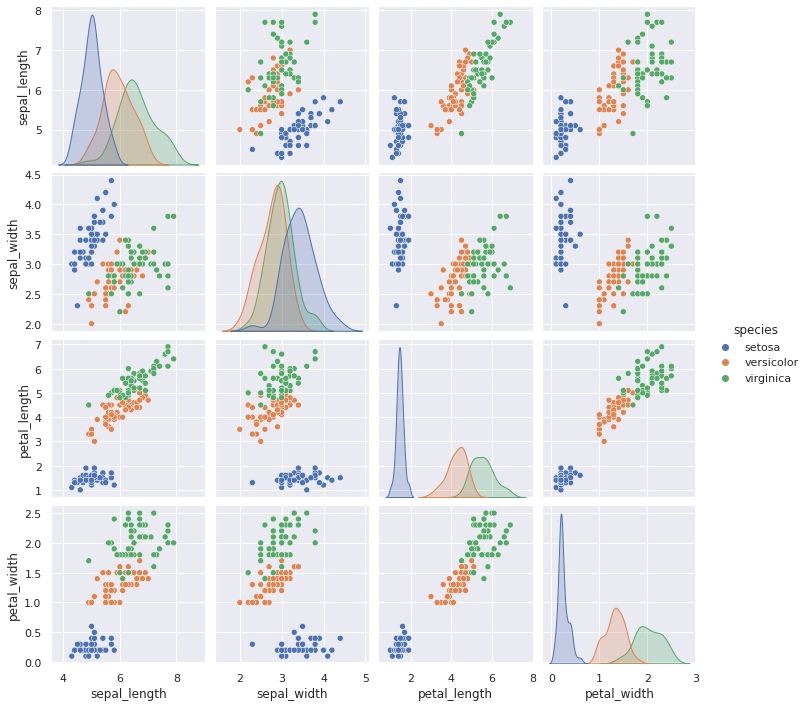

In [ ]:
sns.pairplot(iris, hue='species')

## Activation functions

In [ ]:
def sigmoid(x):  
    return np.exp(-np.logaddexp(0, -x))

In [ ]:
sigmoid(-100)

3.720075976020836e-44

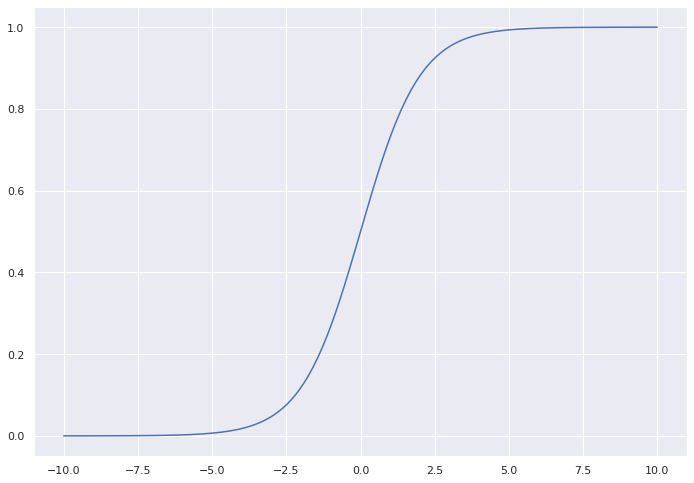

In [ ]:
X_fake = np.linspace(-10, 10, 1000)
plt.plot(X_fake, [sigmoid(y) for y in X_fake])

## Log Loss

$$ L(y, \hat{y}) = - \frac{1}{m} \sum_{i = 0}^{m}{(y_i\log{\hat{y_i}} + (1 - y) \log(1 - \hat{y}))} $$

In [ ]:
def log_loss_score(predicted, actual, eps=1e-14):
  """The logarithmic loss between between the predicted probability assigned to the possible outcomes for item i, and the actual outcome."""

  predicted = np.clip(predicted, eps, 1-eps)
  loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1-predicted))
  return loss

In [ ]:
log_loss_score(0.5, 1)

0.6931471805599453

## Softmax

$$ y = \frac{e^{y_i}}{\sum_{i = 0}^{num\_of\_classes}{e^{y_i}}} $$

In [ ]:
def softmax(x):
  """Compute softmax values for each sets of scores in x."""
  return np.exp(x) / np.sum(np.exp(x), axis=0)

In [ ]:
logits = [2.0, 1.0, 0.1]
softmax(logits)

array([0.65900114, 0.24243297, 0.09856589])

## Benefits of vectorization

In [ ]:
N = 10000

weights = np.random.rand(N) # generate N weights
X = np.random.randint(0, 100, N) # generate N features

In [ ]:
X

array([54, 99, 12, ..., 32, 73, 97])

In [ ]:
def unvectorized(weights, X):
    prediction = 0.0
    for weight, x in zip(weights, X):
        prediction += weights * x
    return prediction

In [ ]:
def vectorized(weights, X):
    prediction = np.dot(weights.T , X)
    return prediction

**Preformanse comparison:**

In [ ]:
%timeit -n100 unvectorized(weights, X)

100 loops, best of 5: 109 ms per loop


In [ ]:
%timeit -n100 vectorized(weights, X)

100 loops, best of 5: 16.9 µs per loop


## sklearn

In [ ]:
X = iris.drop(['species'], axis=1)

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = iris['species']

In [ ]:
np.unique(y)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Model evaluation

In [ ]:
clf.predict([[3, 3, 3, 3]])

array(['setosa'], dtype=object)

In [ ]:
print(f'Score: {clf.score(X, y)}')

Score: 0.9733333333333334


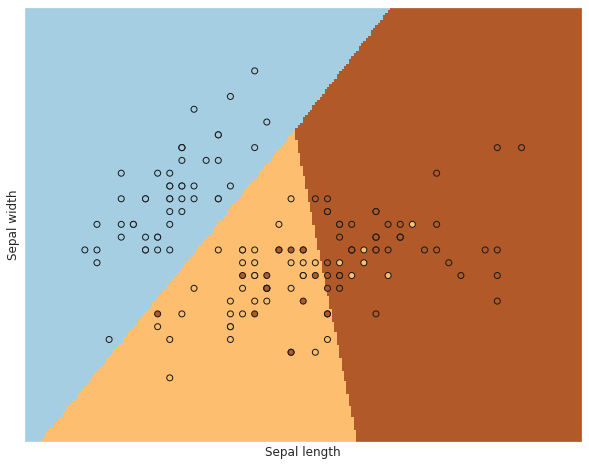

In [ ]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

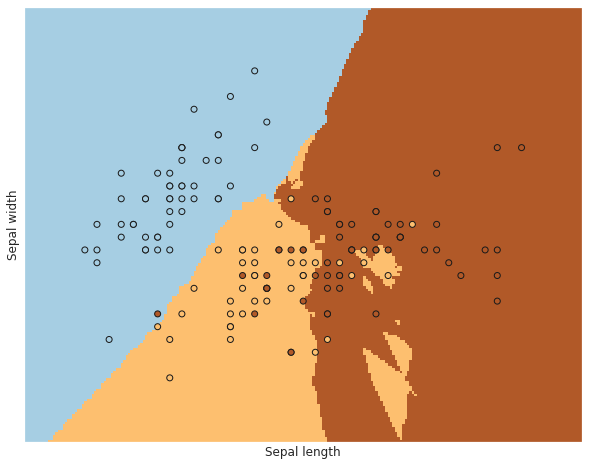

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = KNeighborsClassifier(n_neighbors=11)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()